구해진 회기식에 넣어 평면을 그릴 x1 값들(임의로 넣은 것) 
 [0. 1. 2. 3. 4.]
구해진 회기식에 넣어 평면을 그릴 x2 값들(임의로 넣은 것) 
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]

(2차원으로 표현된) 회기식에 넣을 x1값들 
 [[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]
(2차원으로 표현된) 회기식에 넣을 x2값들 
 [[ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.]
 [ 5.  5.  5.  5.  5.]
 [ 6.  6.  6.  6.  6.]
 [ 7.  7.  7.  7.  7.]
 [ 8.  8.  8.  8.  8.]
 [ 9.  9.  9.  9.  9.]
 [10. 10. 10. 10. 10.]]

위 두 행렬의 각 위치(인덱스)의 x1, x2 입력을 이용해 y값을 계산한 결과
(각 인덱스 위치의 값을 입력 0, 0   1, 0   2, 0   ... )해서 출력 계산
즉, 모든 입력 조합에 대한 출력 계산

[[38.75 47.5  56.25 65.   73.75]
 [40.   48.75 57.5  66.25 75.  ]
 [41.25 50.   58.75 67.5  76.25]
 [42.5  51.25 60.   68.75 77.5 ]
 [43.75 52.5  61.25 70.   78.75]
 [45.   53.75 62.5  71.25 80.  ]
 [46.25 55.   63.75 72.5  81.25]
 [4

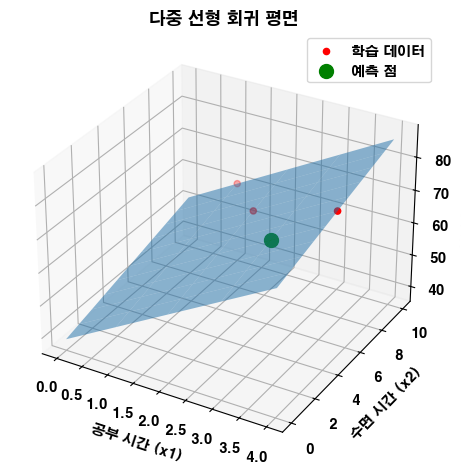

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'HYGothic-Extra'

# 1. 데이터
X = np.array([
    [1, 10],
    [2, 7],
    [4, 5]
])
y = np.array([60, 65, 80])

# 2. 모델 학습
model = LinearRegression()
model.fit(X, y)

# 3. 예측 예시
new_data = np.array([[3, 4]])
predicted_score = model.predict(new_data)


# 4. 시각화용 평면 데이터 생성
# (다중 선형 회기식에 넣어서 평면을 그릴  x1, x2 데이터 생성))

# 다중 선형 회기식에 넣어서 평면을 그릴 x1 데이터 임의로 생성 및 출력
# 테크닉 : 범위(최대값, 최소값)는 x1 학습용 데이터가 들어갈 수 있는 범위로 임의로 생성
# (그래야 평면 안에 원본 데이터가 적절히 표기됨)
x1_range = np.linspace(0, 4, 5)  # 임의로 0부터 4까지 5개의 간격으로 나눠진 넘파이 배열 생성
                                 # 참고로 max(), min()등의 함수를 사용하면 어떤 입력을 넣어도 동작가능하도록 자동화 가능
print("구해진 회기식에 넣어 평면을 그릴 x1 값들(임의로 넣은 것) \n", x1_range)

# x2 데이터도 위의 x1 데이터와 같은 방법으로 임의로 생성
x2_range = np.linspace(0, 10, 11) # 임의로 0부터 10까지 11개의 간격으로 나눠진 넘파이 배열 생성
print("구해진 회기식에 넣어 평면을 그릴 x2 값들(임의로 넣은 것) \n", x2_range)


# meshgrid()는 위의 두 개의 1차원 배열 x1_range와 x2_range를 받아서
# 각각에 대해 '입력값 행렬'을 자동으로 생성,
# 즉, 다중 선형 회기식에 넣을 2차원 모든 데이터의 조합을 자동으로 생성
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
print("\n(2차원으로 표현된) 회기식에 넣을 x1값들 \n", x1_grid)   # 각 행은 x1_range가 반복됨
print("(2차원으로 표현된) 회기식에 넣을 x2값들 \n", x2_grid)   # 각 열은 x2_range가 반복됨
# 예를 들어서 이 두  행렬의 0행 0열의 값이 첫번째 입력되는 x1값, x2값
# 이렇게 만들어진 두 행렬 각 인덱스의 값을 조합해서
# 모두 각각 회기식에 넣으면 모든 x1, x2 입력의  조합을 넣는 것이 가능

# (아까 구한 회기식을 이용해)
# 위의 모든 입력값 x1_grid, x2_grid 조합을 이용해 회기식의 출력값 y 계산
y_grid = model.coef_[0] * x1_grid + model.coef_[1] * x2_grid + model.intercept_
print("\n위 두 행렬의 각 위치(인덱스)의 x1, x2 입력을 이용해 y값을 계산한 결과")
print("(각 인덱스 위치의 값을 입력 0, 0   1, 0   2, 0   ... )해서 출력 계산")
print("즉, 모든 입력 조합에 대한 출력 계산\n")
print(y_grid)


# 5. 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 입력 데이터 시각화
ax.scatter(X[:, 0], X[:, 1], y, color='red', label='학습 데이터')

# 예측 데이터 시각화
ax.scatter(new_data[:, 0], new_data[:, 1], predicted_score, color='green', s=100, label='예측 점')

# 회귀 평면, 위의 x1_grid, x2_grid, y_grid를 이용해 평면 그리기
ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.5)
# 여기서 alpha는 평면의 투명도로 0.0 ~ 1.0 사이의 값
# 1.0 → 완전히 불투명 (진하게 보임)
# 0.0 → 완전히 투명 (안 보임)
# 0.5 → 반투명


# 라벨과 제목 (한글)
ax.set_xlabel('공부 시간 (x1)')
ax.set_ylabel('수면 시간 (x2)')
ax.set_zlabel('시험 점수 (y)')
ax.set_title('다중 선형 회귀 평면')

# 범례 및 레이아웃
ax.legend()
plt.tight_layout()
plt.show()
